## Assignment 9

In [7]:

# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [8]:
# Step 2: Generate synthetic dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

In [9]:
# Step 3: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

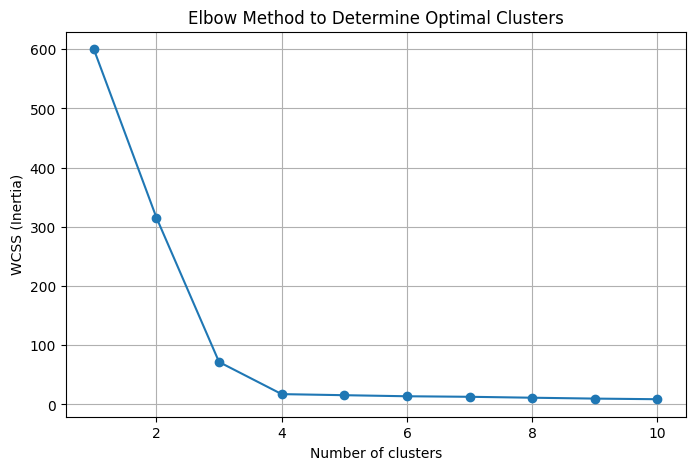

In [11]:
# Step 4: Use Elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    
    # Plot the Elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method to Determine Optimal Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()


In [12]:
# Step 5: Apply K-Means with optimal clusters (suppose elbow shows 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [13]:
# Step 6: Reduce dimensions to 2D for clean visualization (if needed)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

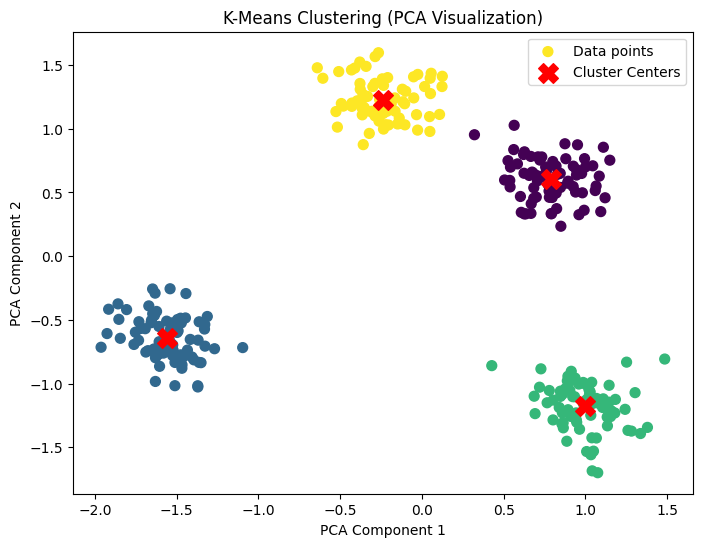

In [14]:
# Step 7: Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Data points')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], 
            s=200, c='red', marker='X', label='Cluster Centers')
plt.title("K-Means Clustering (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()